<a href="https://colab.research.google.com/github/Shoaib7218/Shoaib7218/blob/main/Outlier_detection_and_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outliers

Our Data should be in a particular range if our Data Exceeds that range then that excedded data is known as Outlier. Removal of outliers helps in increasing Accuracy.

Why Remove Outliers?
Impact on Statistical Analysis:

Outliers can skew results: Many statistical methods, like mean, standard deviation, and regression, are sensitive to extreme values. Outliers can distort these statistics, leading to inaccurate results.
Example: If most values are around 10, but you have one value of 1,000, the average will increase significantly, giving a misleading representation of the central tendency.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [25]:
data  = pd.read_csv('/content/2019-Dec.csv')
df = pd.DataFrame(data)

In [ ]:
print(df.describe())

Outlier Detection USing Box Plot

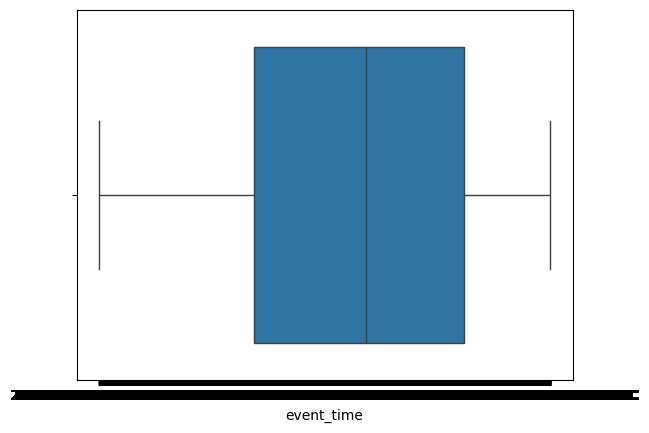

<Figure size 1500x1000 with 0 Axes>

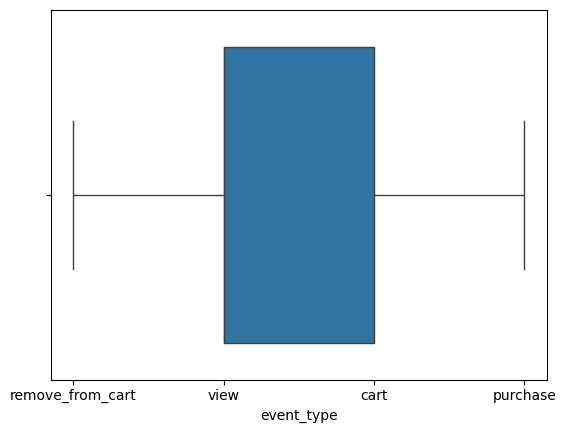

<Figure size 1500x1000 with 0 Axes>

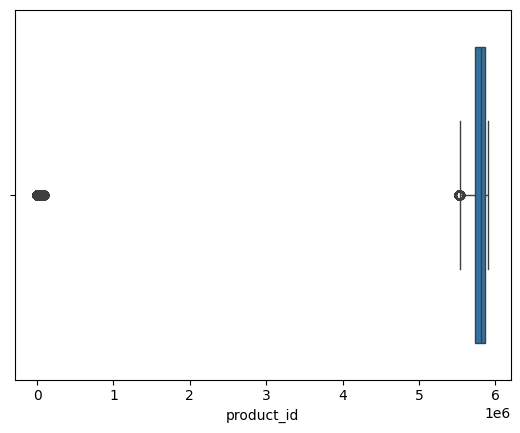

<Figure size 1500x1000 with 0 Axes>

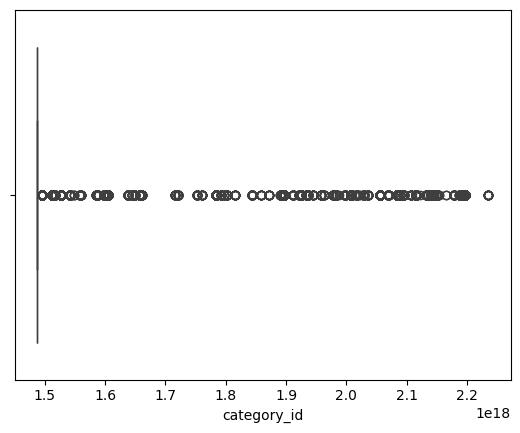

<Figure size 1500x1000 with 0 Axes>

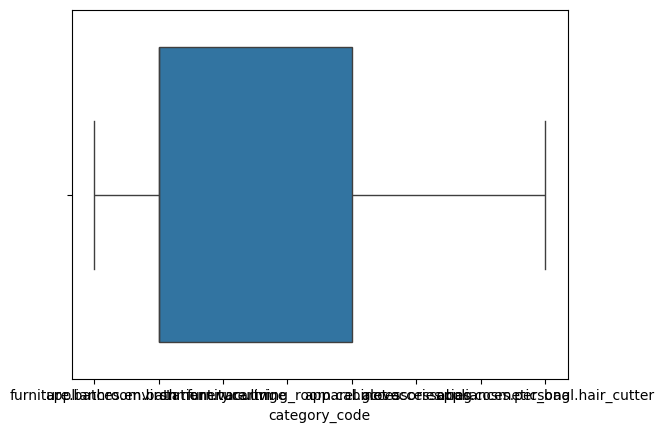

<Figure size 1500x1000 with 0 Axes>

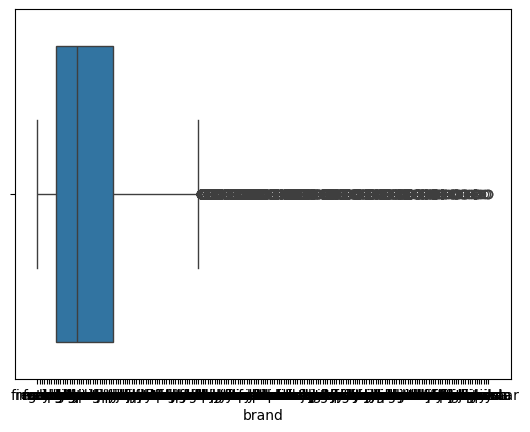

<Figure size 1500x1000 with 0 Axes>

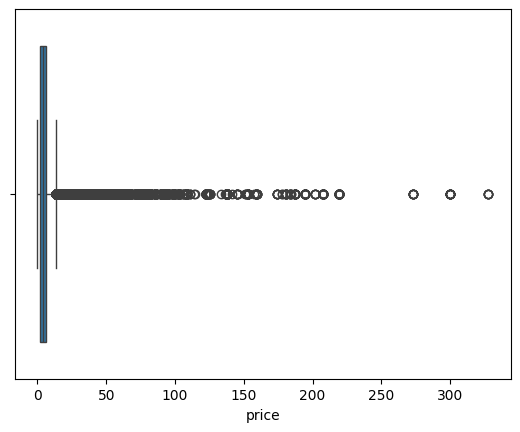

<Figure size 1500x1000 with 0 Axes>

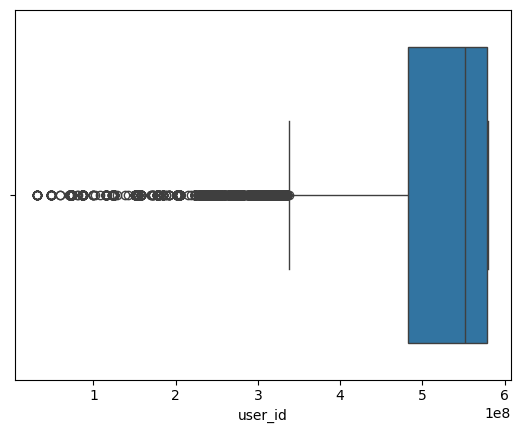

<Figure size 1500x1000 with 0 Axes>

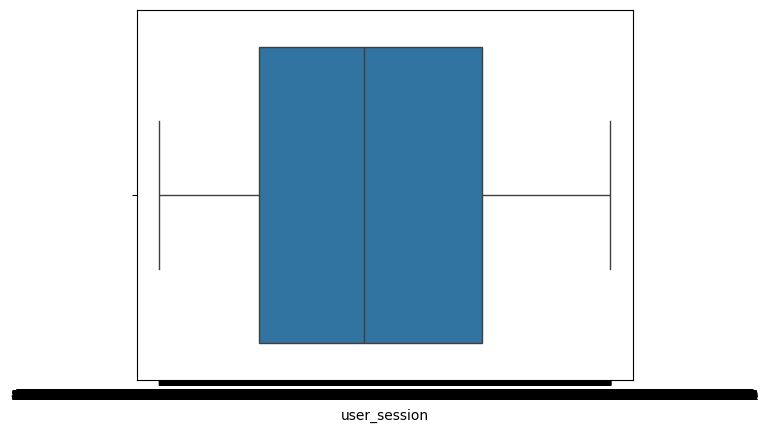

<Figure size 1500x1000 with 0 Axes>

In [13]:
for i in df.columns:
  sb.boxplot(x=df[i]) # df[i] extracting data from the columns name
  plt.figure(figsize=(15,10))
  plt.show()




Outlier Detection USing Distribution plot

<ipython-input-31-1bc396a99cea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['product_id'])


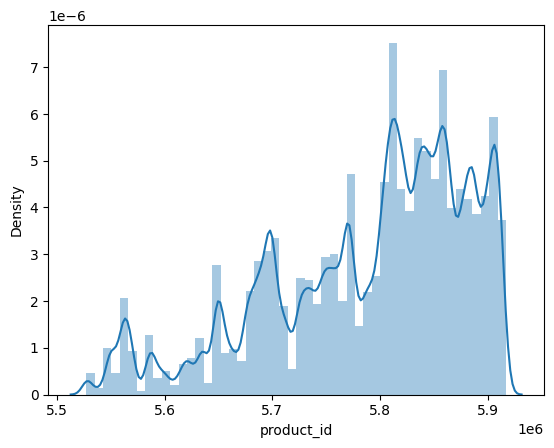

In [31]:
sb.distplot(df['product_id'])
plt.show()

Outlier Handling Using Interquantile Range

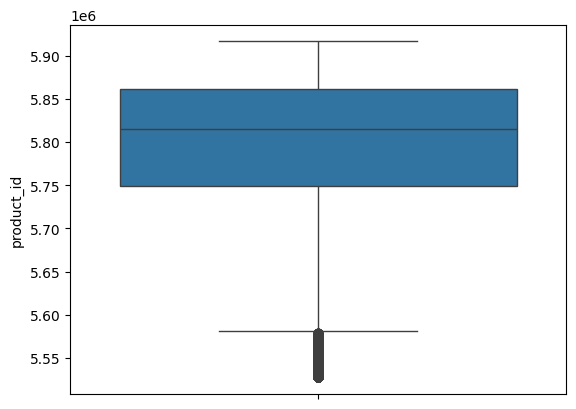

In [26]:
q1 = np.percentile(df['product_id'],25)
q3 = np.percentile(df['product_id'],75)

iqr = q3-q1

lower_bound = q1 - iqr *1.5
upper_bound = q3 + iqr *1.5

df = df[(df['product_id']>=lower_bound) & (df['product_id']<= upper_bound)]

sb.boxplot(df['product_id'])
plt.show()


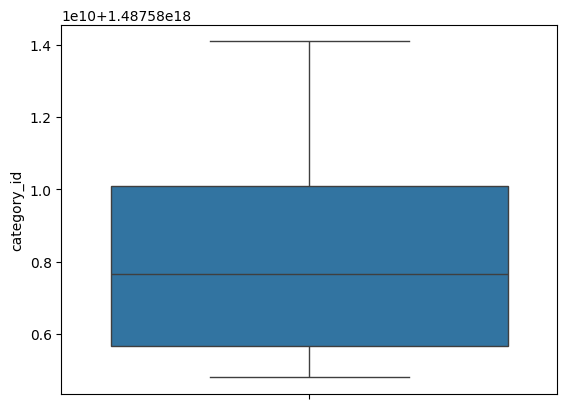

In [27]:
q1 = np.percentile(df['category_id'],25,axis =0 )
q3 = np.percentile(df['category_id'],75)

iqr = q3-q1

lower_bound = q1 - iqr *1.5
upper_bound = q3 + iqr *1.5

df = df[(df['category_id']>=lower_bound) & (df['category_id']<= upper_bound)]

sb.boxplot(df['category_id'])
plt.show()

In [28]:
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,NaN,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,NaN,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,NaN,roubloff,5.40,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1
10,2019-12-01 00:00:40 UTC,cart,5755170,1487580009387261981,NaN,NaN,2.79,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d
11,2019-12-01 00:00:44 UTC,remove_from_cart,5650294,1487580007835370453,NaN,metzger,3.33,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc


Outlier Handling USing Z Score


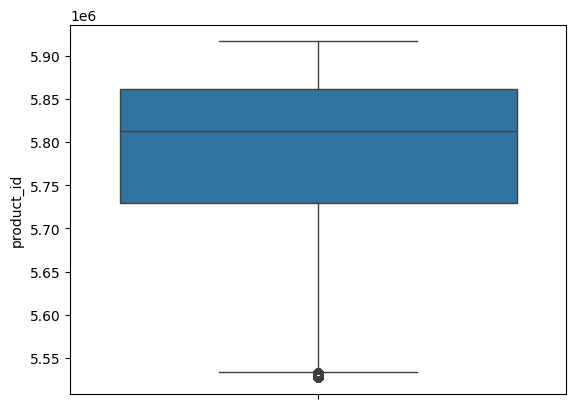

In [35]:
min_range = df['product_id'].mean() - (3*df['product_id'].std())
max_range = df['product_id'].mean() + (3*df['product_id'].std())

df[(df['product_id']>=min_range) & (df['product_id']<=min_range)]

sb.boxplot(df['product_id'])
plt.show()

Here we have removed the Z_score

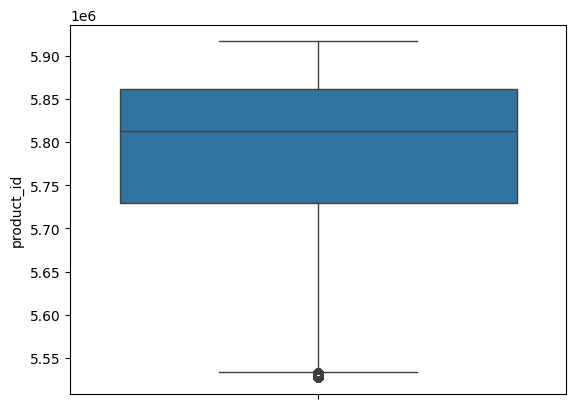

In [43]:
z_score  = df['product_id'] - df['product_id'].mean() / df['product_id'].std()
z_score_l_3 = z_score>-3
z_score_g_3 = z_score<3
# print(z_score<3,)
df[(df['product_id']>=z_score_l_3) & (df['product_id']<=z_score_g_3)]
sb.boxplot(df['product_id'])
plt.show()